In [1]:
import numpy as np 

from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
from qiskit.compiler import transpile


import matplotlib.pyplot as plt
import matplotlib.image as mpimg


from project_qsiris.conversion_qiskit_qo import qiskit_to_odyssey, save_odyssey_puzzle

## This runbook allows you to convert any Qiskit circuit to a Quantum Odyssey puzzle

### Example_001:

You can convert any qiskit gates to QO. If there are any problems for the conversion, contact the Owner ;)

Protip: Transpile the Qiskit circuit first and everything will be fine..

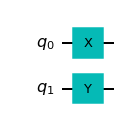

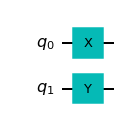

In [2]:
#Add here any Qiskit gates you'd like to be converted to Quantum Odyssey. What you see bellow is an example
#You can change the QuantumRegister between 1 to 5 qubits.
qreg_q = QuantumRegister(2,'q')
circuit = QuantumCircuit(qreg_q)



circuit.x(qreg_q[0])
circuit.y(qreg_q[1])


circuit.draw('mpl')

In [3]:
# This creates the QO puzzle out of your Qiskit circuit. 
# You can save it in two ways: General (as an actual puzzle to be solved) or Editor (to just visualize it in QO).
puzzle = qiskit_to_odyssey(circuit, puzzle_type="General")
# The name of the puzzle (by default example_001). QO puzzles have extension .qpf
save_odyssey_puzzle(puzzle, 'example_001' )

circuit-0 saved:circuits/qiskit_to_odyssey/example_001.qpf


### Example_002

If you have more complex gates it would be better if you transpile your circuit first at least for the moment.

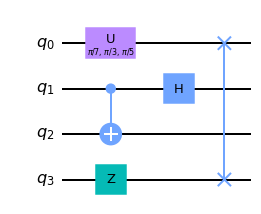

In [4]:
#Step 1: Build the circuit in Qiskit

qreg_q = QuantumRegister(4,'q')
circuit = QuantumCircuit(qreg_q)

circuit.cx(qreg_q[1],qreg_q[2])

circuit.h(qreg_q[1])
circuit.z(qreg_q[3])
circuit.u(np.pi/7,np.pi/3,np.pi/5,qreg_q[0])
circuit.swap(qreg_q[0], qreg_q[3])

circuit.draw('mpl')

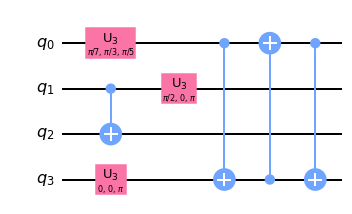

In [5]:
#Step 2: Transpile your Qiskit circuit to simple gates to conversion avoid problems 

circuit = transpile(circuit, basis_gates=['id','u3', 'cx'], optimization_level=1, seed_transpiler=1) 
circuit.draw(output='mpl')

In [6]:
#Step 3: Convert your circuit in dictionary that represents a QO puzzle.
puzzle=qiskit_to_odyssey(circuit, puzzle_type="General")


#Step 4: Save your puzzle 
save_odyssey_puzzle(puzzle, 'example_002' )

vec: [1]
vec: [0]
vec: [0]
vec: [0]
vec: [0]
vec: [0]
vec: [0]
vec: [0]
vec: [0]
vec: [0]
vec: [0]
vec: [0]
vec: [0]
vec: [0]
vec: [0]
vec: [0]
vec: [1]
vec: [0]
vec: [0]
vec: [0]
vec: [0]
vec: [0]
vec: [0]
vec: [0]
vec: [0]
vec: [0]
vec: [0]
vec: [0]
vec: [0]
vec: [0]
vec: [0]
vec: [0]
vec: [ 0.97492791+0.j         -0.18002322-0.13079452j]
vec: [ 0.11126047+0.19270878j -0.10190772+0.96958716j]
vec: [0.70710678+0.00000000e+00j 0.70710678-8.65956056e-17j]
vec: [ 0.70710678+0.00000000e+00j -0.70710678+8.65956056e-17j]
vec: [1.+0.j 0.+0.j]
vec: [ 0.+0.0000000e+00j -1.+1.2246468e-16j]
circuit-1 saved:circuits/qiskit_to_odyssey/example_002.qpf


### Example_003

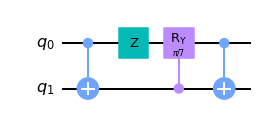

In [7]:
circuit = QuantumCircuit(2,name='matchgate_2Q')

circuit.cx(0,1)
circuit.z(0)
circuit.cry(np.pi/7,1,0)
circuit.cx(0,1)

circuit.draw('mpl')

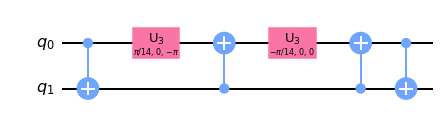

In [8]:
circuit = transpile(circuit, basis_gates=['id','u3', 'cx'], optimization_level=1, seed_transpiler=1) 
circuit.draw(output='mpl')

In [9]:
puzzle = qiskit_to_odyssey(circuit)
save_odyssey_puzzle(puzzle, 'example_003' )

vec: [1]
vec: [0]
vec: [0]
vec: [0]
vec: [1]
vec: [0]
vec: [0]
vec: [0]
vec: [0.99371221+0.00000000e+00j 0.11196448+1.37116937e-17j]
vec: [ 0.11196448+0.00000000e+00j -0.99371221-1.21694648e-16j]
vec: [0.99371221+0.j 0.11196448+0.j]
vec: [-0.11196448+0.j  0.99371221+0.j]
matchgate_2Q saved:circuits/qiskit_to_odyssey/example_003.qpf


Text(0.5, 1.0, 'Circuit in QO as a gate')

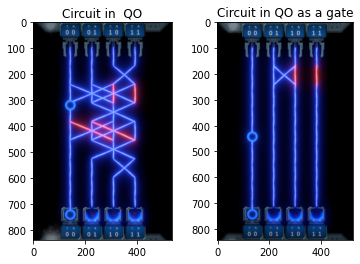

In [10]:
# Let's see here how the default example_003 puzzle file will look like in Quantum Odyssey
img_circuit = mpimg.imread('img/qiskit_circuit_to_QO.png')
img_circuit_gate = mpimg.imread('img/qo_circuit_as_1gate.png')

fig, ax = plt.subplots(1,2)
ax[0].imshow(img_circuit);
ax[1].imshow(img_circuit_gate);

ax[0].set_title('Circuit in  QO')
#Quantum Odyssey allows compilation of any number of logic gates in a single custom gate (right side bellow=left)
ax[1].set_title('Circuit in QO as a gate')

In [11]:
#Here is how the QO puzzle file looks like, this is an example
puzzle

{'PuzzleDefinition': {'ModuleID': 'Qiskit',
  'ID': 57,
  'QubitCapacity': 2,
  'GateCapacity': 7,
  'Name': 'matchgate_2Q',
  'InitialState': [[{'Real': 1, 'Imaginary': 0, 'Magnitude': 1, 'Phase': 0.0}],
   [{'Real': 0, 'Imaginary': 0, 'Magnitude': 0, 'Phase': 0.0}],
   [{'Real': 0, 'Imaginary': 0, 'Magnitude': 0, 'Phase': 0.0}],
   [{'Real': 0, 'Imaginary': 0, 'Magnitude': 0, 'Phase': 0.0}]],
  'FinalState': [[{'Real': 1, 'Imaginary': 0, 'Magnitude': 1, 'Phase': 0.0}],
   [{'Real': 0, 'Imaginary': 0, 'Magnitude': 0, 'Phase': 0.0}],
   [{'Real': 0, 'Imaginary': 0, 'Magnitude': 0, 'Phase': 0.0}],
   [{'Real': 0, 'Imaginary': 0, 'Magnitude': 0, 'Phase': 0.0}]],
  'FinalBallState': [[{'Real': 1.0,
     'Imaginary': 0.0,
     'Magnitude': 0.0,
     'Phase': 0.0},
    {'Real': 0.0, 'Imaginary': 0.0, 'Magnitude': 0.0, 'Phase': 0.0},
    {'Real': 0.0, 'Imaginary': 0.0, 'Magnitude': 0.0, 'Phase': 0.0},
    {'Real': 0.0, 'Imaginary': 0.0, 'Magnitude': 0.0, 'Phase': 0.0}],
   [{'Real': 0.0, 'Im